## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [5]:
# @SHOW
!pip install scikit-learn
!pip install matplotlib numpy scikit-learn
!pip install pandas
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 40.1 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

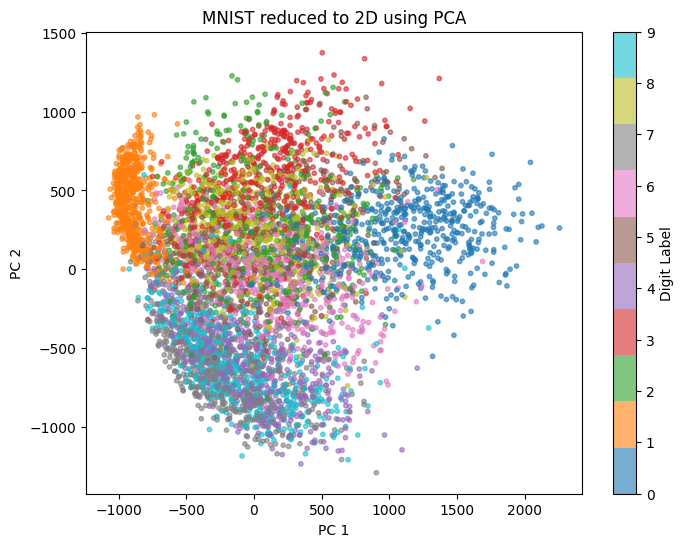

In [ ]:

pca_2d = PCA(n_components=2)
X_mnist_pca = pca_2d.fit_transform(X_mnist_train)

# Plot 2D scatter
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_mnist_pca[:,0], X_mnist_pca[:,1], c=y_mnist_train, cmap="tab10", alpha=0.6, s=10)
plt.colorbar(scatter, label="Digit Label")
plt.title("MNIST reduced to 2D using PCA")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

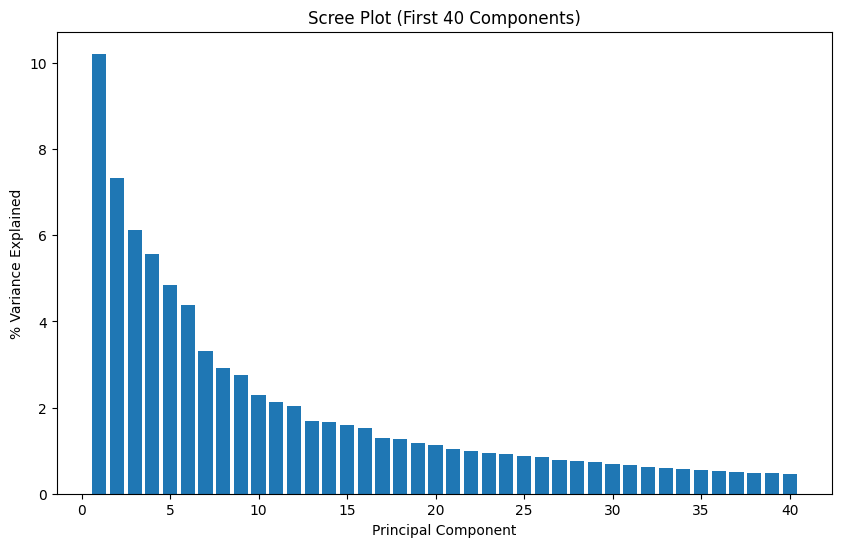

In [ ]:

pca_full = PCA()
pca_full.fit(X_mnist_train)

explained_var = pca_full.explained_variance_ratio_[:40] * 100

plt.figure(figsize=(10,6))
plt.bar(range(1,41), explained_var)
plt.xlabel("Principal Component")
plt.ylabel("% Variance Explained")
plt.title("Scree Plot (First 40 Components)")
plt.show()


#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [ ]:

cumulative_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"Number of components needed for 95% variance: {n_components_95}")


Number of components needed for 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

In [10]:
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.
    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

Original Digit:


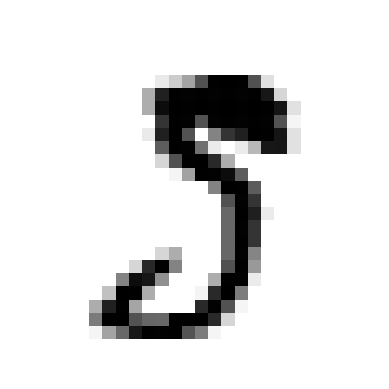

Reconstructed Digit (with PCA 95% variance):


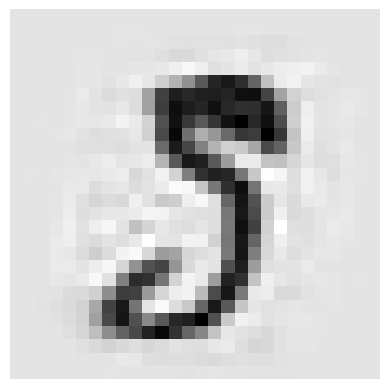

In [ ]:


# Use the number of components identified in Step 4 (n_components_95)
pca_95 = PCA(n_components=n_components_95)
X_train_reduced = pca_95.fit_transform(X_mnist_train)

# Reconstruct the digits back to original 784 space
X_train_reconstructed = pca_95.inverse_transform(X_train_reduced)

# Pick a digit index to visualize
digit_index = 0

print("Original Digit:")
plot_mnist_digit(X_mnist_train[digit_index])

print("Reconstructed Digit (with PCA 95% variance):")
plot_mnist_digit(X_train_reconstructed[digit_index])



### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [ ]:

# Without PCA
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print("KNN Accuracy (without PCA):", accuracy_score(y_mnist_test, y_pred))

# With PCA (80% variance)
cumulative_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components_80 = np.argmax(cumulative_var >= 0.80) + 1

pca_80 = PCA(n_components=n_components_80)
X_train_pca80 = pca_80.fit_transform(X_mnist_train)
X_test_pca80 = pca_80.transform(X_mnist_test)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca80, y_mnist_train)
y_pred_pca = knn_pca.predict(X_test_pca80)
print("KNN Accuracy (with PCA 80% variance):", accuracy_score(y_mnist_test, y_pred_pca))


KNN Accuracy (without PCA): 0.9428571428571428
KNN Accuracy (with PCA 80% variance): 0.9457142857142857


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

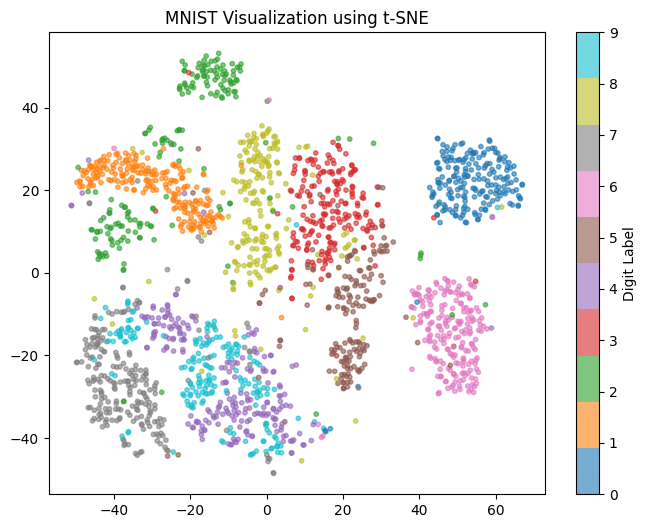

In [ ]:

from sklearn.manifold import TSNE

# To save time, use a subset (e.g., 2000 samples)
X_subset, y_subset = X_mnist_train[:2000], y_mnist_train[:2000]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_subset, cmap="tab10", alpha=0.6, s=10)
plt.colorbar(scatter, label="Digit Label")
plt.title("MNIST Visualization using t-SNE")
plt.show()



2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [14]:

# Train/test split on subset
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Run t-SNE on train/test separately
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_tsne)
X_test_tsne = tsne.fit_transform(X_test_tsne)

# KNN
knn_tsne = KNeighborsClassifier(n_neighbors=3)
knn_tsne.fit(X_train_tsne, y_train_tsne)
y_pred_tsne = knn_tsne.predict(X_test_tsne)

print("KNN Accuracy with t-SNE:", accuracy_score(y_test_tsne, y_pred_tsne))


KNN Accuracy with t-SNE: 0.03


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 53.1 MB/s  0:00:006m0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 41.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 50.2 MB/s  0:00:016m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [umap-learn]5 [umap-learn]
Note: you may need to restart the kernel to use updated packages.


/workspaces/week-4-materials-selvina123/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/workspaces/week-4-materials-selvina123/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


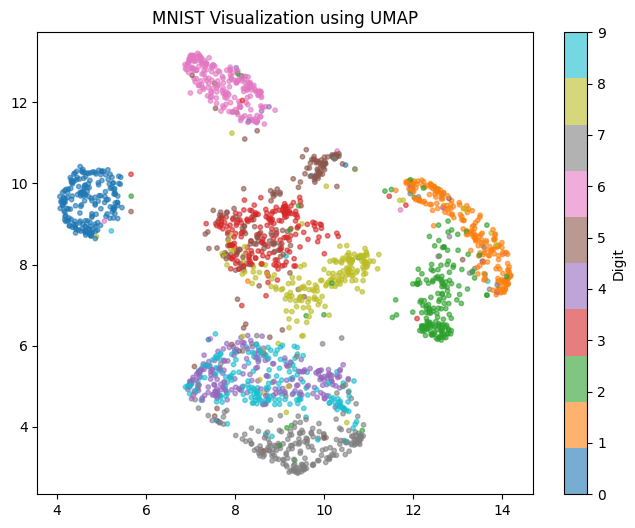

In [16]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

%pip install numpy==2.0
%pip install umap-learn
import umap

# Use a subset (e.g., 2000 samples)
X_subset, y_subset = X_mnist_train[:2000], y_mnist_train[:2000]

# UMAP reduction to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_subset)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:,0], X_umap[:,1], c=y_subset, cmap="tab10", alpha=0.6, s=10)
plt.colorbar(scatter, label="Digit")
plt.title("MNIST Visualization using UMAP")
plt.show()

In [17]:

# Train/test split
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Fit UMAP on train, transform both
umap_reducer = umap.UMAP(n_components=20, random_state=42)  # 20D often works better
X_train_u_reduced = umap_reducer.fit_transform(X_train_u)
X_test_u_reduced = umap_reducer.transform(X_test_u)




/workspaces/week-4-materials-selvina123/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Now, calculate accuracy with KNN.

In [ ]:

# KNN
knn_umap = KNeighborsClassifier(n_neighbors=3)
knn_umap.fit(X_train_u_reduced, y_train_u)
y_pred_umap = knn_umap.predict(X_test_u_reduced)

print("KNN Accuracy with UMAP:", accuracy_score(y_test_u, y_pred_umap))

KNN Accuracy with UMAP: 0.86


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


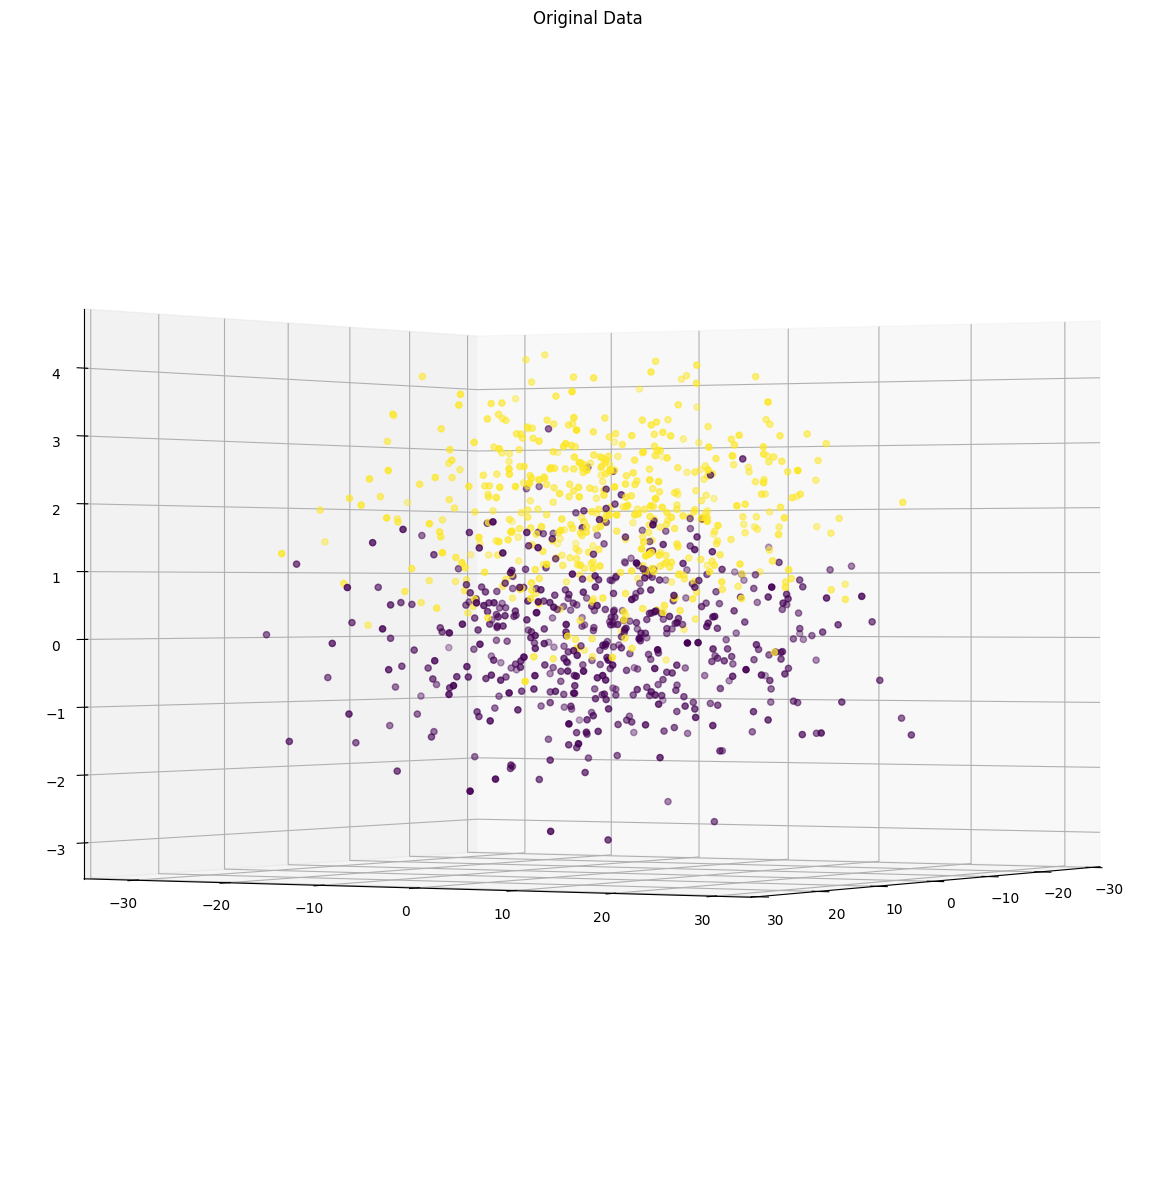

In [20]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [19]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.9421428571428572


1. Try with PCA

In [21]:

# PCA reduction
for n in [2, 5, 10]:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)

    print(f"PCA Accuracy with {n} components: {accuracy_score(y_test, y_pred)}")

PCA Accuracy with 2 components: 0.425
PCA Accuracy with 5 components: 0.7278571428571429
PCA Accuracy with 10 components: 0.9135714285714286


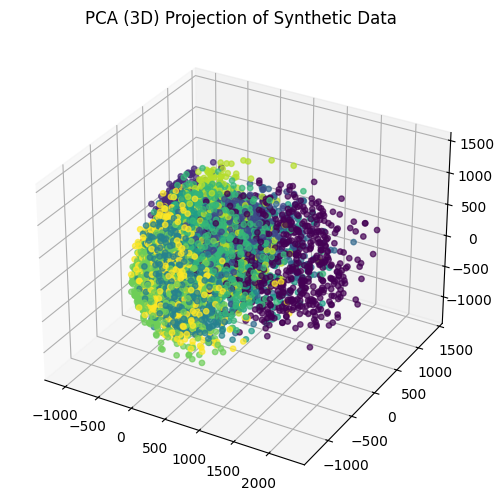

In [ ]:

# PCA with 3 components
pca_3d = PCA(n_components=3)
X_train_pca3 = pca_3d.fit_transform(X_train)

# 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca3[:,0], X_train_pca3[:,1], X_train_pca3[:,2], c=y_train, cmap="viridis", s=15, alpha=0.7)
ax.set_title("PCA (3D) Projection of Synthetic Data")
plt.show()

2. Try with UMAP.

In [22]:
for n in [2, 5, 10]:
    umap_reducer = umap.UMAP(n_components=n, random_state=42)
    X_train_umap = umap_reducer.fit_transform(X_train)
    X_test_umap = umap_reducer.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_umap, y_train)
    y_pred = knn.predict(X_test_umap)

    print(f"UMAP Accuracy with {n} components: {accuracy_score(y_test, y_pred)}")


/workspaces/week-4-materials-selvina123/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP Accuracy with 2 components: 0.8707142857142857


/workspaces/week-4-materials-selvina123/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP Accuracy with 5 components: 0.9057142857142857


/workspaces/week-4-materials-selvina123/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP Accuracy with 10 components: 0.9071428571428571


/workspaces/week-4-materials-selvina123/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


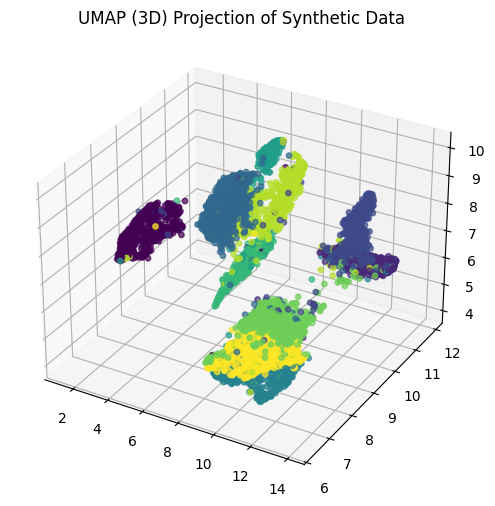

In [25]:

# UMAP with 3 components
umap_reducer_3d = umap.UMAP(n_components=3, random_state=42)
X_train_umap3 = umap_reducer_3d.fit_transform(X_train)

# 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_umap3[:,0], X_train_umap3[:,1], X_train_umap3[:,2], c=y_train, cmap="viridis", s=15, alpha=0.7)
ax.set_title("UMAP (3D) Projection of Synthetic Data")
plt.show()


Explain your results in the cell below.  Which works better?  Why?


PCA is a linear method, which means it works best when the patterns in the data can be separated along straight directions. It’s simple, fast, and does a good job of keeping most of the variance in the data. The downside is that it can miss more complex, curved, or nonlinear structures.

UMAP, on the other hand, is a nonlinear method. It focuses on preserving the local neighborhood structure of the data, so it’s better at capturing complicated patterns and separating clusters that PCA might blend together.

In practice, this often means that UMAP outperforms PCA when the data has messy or nonlinear relationships, such as MNIST digits or the synthetic dataset with overlapping clusters. PCA is still a solid choice for speed and simplicity, but UMAP usually produces embeddings that make models like KNN perform better.